# Fourier Series of simple curves

This notebook shows how to transform a (closed) curve into a Fourier series.

### Content
1. [Prerequisites](#prerequisites)
2. [Some Theory: Fourier Series](#theory)
3. [Computing the Fourier coefficients](#computing_coefficients)
    1. [Straight Lines](#straight_lines)
        1. [Proof](#straight_lines_proof)
        2. [Implementation](#straight_lines_implementation)
        3. [Example](#straight_lines_example)

In [1]:
%matplotlib inline

# Initial imports
import numpy as np
import matplotlib.pyplot as plt

## Prerequisites <a id='prerequisites'></a>
Let's assume we have a curve consisting segments from the following types:
- Straight Lines
- Arcs
- Bezier Curves

We might add further types of segments, later. Currently, these are exactly the types of segments, an SVG path consists of, which we will later use as source for the curve.

Such a curve can be seen as piecewise function $f:[0,2\pi]\to\mathbb{C}$ where the 2D-point of the curve are represented as complex numbers. Given $m$ pieces, there exist function $f_1,\ldots,f_m$ of these pieces and border points $t_0,\ldots,t_m$, $0=t_0 < t_1 < \ldots < t_m = 2\pi$ so that

$$
f(t) = f_i(t)\,\text{ for }\,t\in[t_{i-1},t_i[
$$

For the sake of simplicity, we further assume for the moment that the curve is continuous and closed, i.e. 
- all pieces $f_i$ are continuous, 
- the pieces are connected: $f_i(t_i) = f_{i+1}(t_i)$,
- and the curve starts where it ends: $f(0) = f(2\pi)$

## Some Theory: Fourier Series <a id='theory'></a>
Given a integrable function $f:[0,2\pi]\to\mathbb{C}$, the Fourier series of $f$ is defined by its finite subsequences:

$$\hat{f}_n(t) = \sum_{k=-n}^n c_ke^{ikt},\quad t\in[0,2\pi]$$

with Fourier coefficients

$$c_k := \frac{1}{2\pi}\int_0^{2\pi}f(t)e^{ikt}dt$$

__Note:__ There is not guarentee, that $\hat{f}_n$ converges in the general case and if it converges, it does not necessarily converge against $f$.  
Luckily, (pointwise) convergence is guarenteed for continuous almost always differentiable functions. In case of our continuous piecewise function with differential pieces, this condition is met.

## Computing the Fourier coefficients <a id='computing_coefficients'></a>
In order to compute the Fourier coefficients we need to solve aboves integrals for the pieces over an interval $[t_{i-1}, t_i[$. This will be done in the following.

### Straight lines <a id='straight_lines'></a>
A straight line $g$ from point $p_1$ to point $p_2$, defined over the interval $[a,b]$, is given by

$$
    g(t) = p_1\frac{b-t}{b-a} + p_2\frac{t - a}{b - a}
$$

Using this, we can compute the contribution of a straight line segment to the Fourier coefficients of our piecewise functions:

_Case 1:_ $k=0$:  
$$ 
    \int_a^b g(t)e^{ikt}dt = \frac{1}{2}\left(p_1 + p_2)(b - a)\right)
$$

_Case 2:_ $k\neq 0$:  
$$ 
    \int_a^b g(t)e^{ikt}dt = \frac{ie^{ika}}{k} p_1
           -\frac{ie^{ikb}}{k}p_2
           +\frac{1}{k^2}\frac{p_2-p_1}{b-a}\left(e^{ikb}-e^{ika}\right)
$$

#### Proof: <a id='straight_lines_proof'></a>
We can rewrite $g$ as:
$$
g(t) = \frac{p_1b - p_2a}{b-a} + t\frac{p_2-p_1}{b-a}
$$

Using this, we can compute the integral as:  
_Case 1:_ $k=0$:  
$$ 
\begin{align*}
    \int_a^b g(t)e^{ikt}dt &= \int_a^b g(t)dt \\
        &= \frac{p_1b - p_2a}{b-a}\left(b-a\right) + \frac{p_2-p_1}{b-a}\frac{1}{2}\left(b^2-a^2\right)\\
        &= \left(p_1b - p_2a\right) + \frac{1}{2}\left(p_2-p_1\right)\left(a+b\right)\\
        &= \frac{1}{2}\left(p_1b - p_2a + p_2b - p_1a\right)\\
        &= \frac{1}{2}\left(p_1 + p_2)(b - a)\right)
\end{align*}
$$

_Case 2:_ $k\neq 0$:  
$$
\begin{align*}
    \int_a^b g(t)e^{ikt}dt &= \int_a^b \left(\frac{p_1b - p_2a}{b-a} + t\frac{p_2-p_1}{b-a}\right)e^{ikt}dt\\
        &= \frac{p_1b - p_2a}{b-a} \int_a^b e^{ikt}dt + \frac{p_2-p_1}{b-a}\int_a^b te^{ikt}dt\\
        &= \frac{p_1b - p_2a}{b-a} \left[\frac{e^{ikt}}{ik}\right]_{t=a}^b + \frac{p_2-p_1}{b-a}\left(\left[\frac{te^{ikt}}{ik}\right]_{t=a}^b-\int_a^b \frac{e^{ikt}}{ik}dt\right)\\
        &= -\frac{i}{k}\frac{p_1b - p_2a}{b-a} \left(e^{ikb}-e^{ika}\right) - \frac{i}{k}\frac{p_2-p_1}{b-a}\left(be^{ikb}-ae^{ika}\right) + \frac{1}{k^2}\frac{p_2-p_1}{b-a}\left(e^{ikb}-e^{ika}\right)\\
        &= \frac{e^{ika}}{b-a} \frac{i}{k}\left(p_1b - p_2a + p_2a - p_1a\right) - \frac{e^{ikb}}{b-a} \frac{i}{k}\left(p_1b - p_2a + p_2b - p_1b\right) + \frac{1}{k^2}\frac{p_2-p_1}{b-a}\left(e^{ikb}-e^{ika}\right)\\
        &= \frac{ie^{ika}}{k} p_1 -\frac{ie^{ikb}}{k}p_2 +\frac{1}{k^2}\frac{p_2-p_1}{b-a}\left(e^{ikb}-e^{ika}\right)
\end{align*}
$$

#### Implementation <a id='straight_lines_implementation'></a>
Beginning with a single staight line segment

In [2]:
def transform_straight_line(p1, p2, k, a, b):
    i = 1j   # Just for shorter notations
    
    k = np.asarray(k)
    result = np.zeros(shape=k.shape, dtype=np.complex)
    
    # Handle Case k != 0
    k_ = k[k!=0]
    result[k!=0] = i * np.exp(i*k_*a) * p1 / k_ \
           - i * np.exp(i*k_*b) * p2 / k_ \
           + (p2 - p1) * (np.exp(i*k_*b) - np.exp(i*k_*a)) / (k_*k_*(b - a))
    
    # Handle case k=0
    result[k==0] = (p1 + p2) * (b - a) / 2
    
    # Return results
    return result

Extending this to closed sequences of lines.

_Note:_ There are different ways to termine the segment-borders $t_0,\ldots,t_m$. Here we use the length of the lines.

In [3]:
def transform_polygon(p, n):
    m = len(p)   # Number of Segments (if we close the path)
    
    # Close the curve: add the beginning point at the end
    p = np.reshape(p, (-1))
    p = p[list(range(m)) + [0]]
    
    # Length of the segments
    l = np.abs(p[1:] - p[:-1])
    
    # Compute t_0 to t_m based on the lengths with t_0 = 0 and t_m = 2\pi
    t = l.cumsum() / l.sum()
    t = 2 * np.pi * np.concatenate([[0], t])
    
    # get vector of k
    k = np.arange(-n,n+1)
    
    c = sum([transform_straight_line(p[i], p[i+1], k, t[i], t[i+1]) for i in range(m)])
    
    return c, k


Get the fourier approximation as a function.  
This will be used to plot the fourier approximation.

In [4]:
def get_fourier_fct(c, k):
    # Reshape the fourier coefficients row vectors
    c = np.reshape(c, (1,-1))
    k = np.reshape(k, (1,-1))
    
    def fct(t):
        # Reshape the input values into a column vector
        t = np.reshape(t, (-1,1))
        
        return np.sum(c * np.exp(1j * k * t), axis=1) / (2 * np.pi)
    
    return fct

#### Example: Triangle <a id='straight_lines_example'></a>

In [5]:
# Corner points of the triangle as complex numbers
p = [-1 -1j,
     0.5 + 3j,
     12
    ]

In [6]:
N = 12

# Compute coefficients c_{-N} to c_N
c,k = transform_polygon(p, N)

# Get approximations (limited to different values n=1,...,N)
fcts = [get_fourier_fct(c[np.abs(k) <= n], k[np.abs(k) <= n]) for n in range(1,N+1)]

Plotting the results

In [7]:
# plot closed curve of complex 
def plotcc(p, *args, **kwargs):
    # close curve
    m = len(p)
    p = np.reshape(p, (-1))
    p = p[list(range(m)) + [0]]
    
    # Complex to real x and y vectors
    x, y = np.real(p), np.imag(p)
    
    plt.plot(x, y, *args, **kwargs)

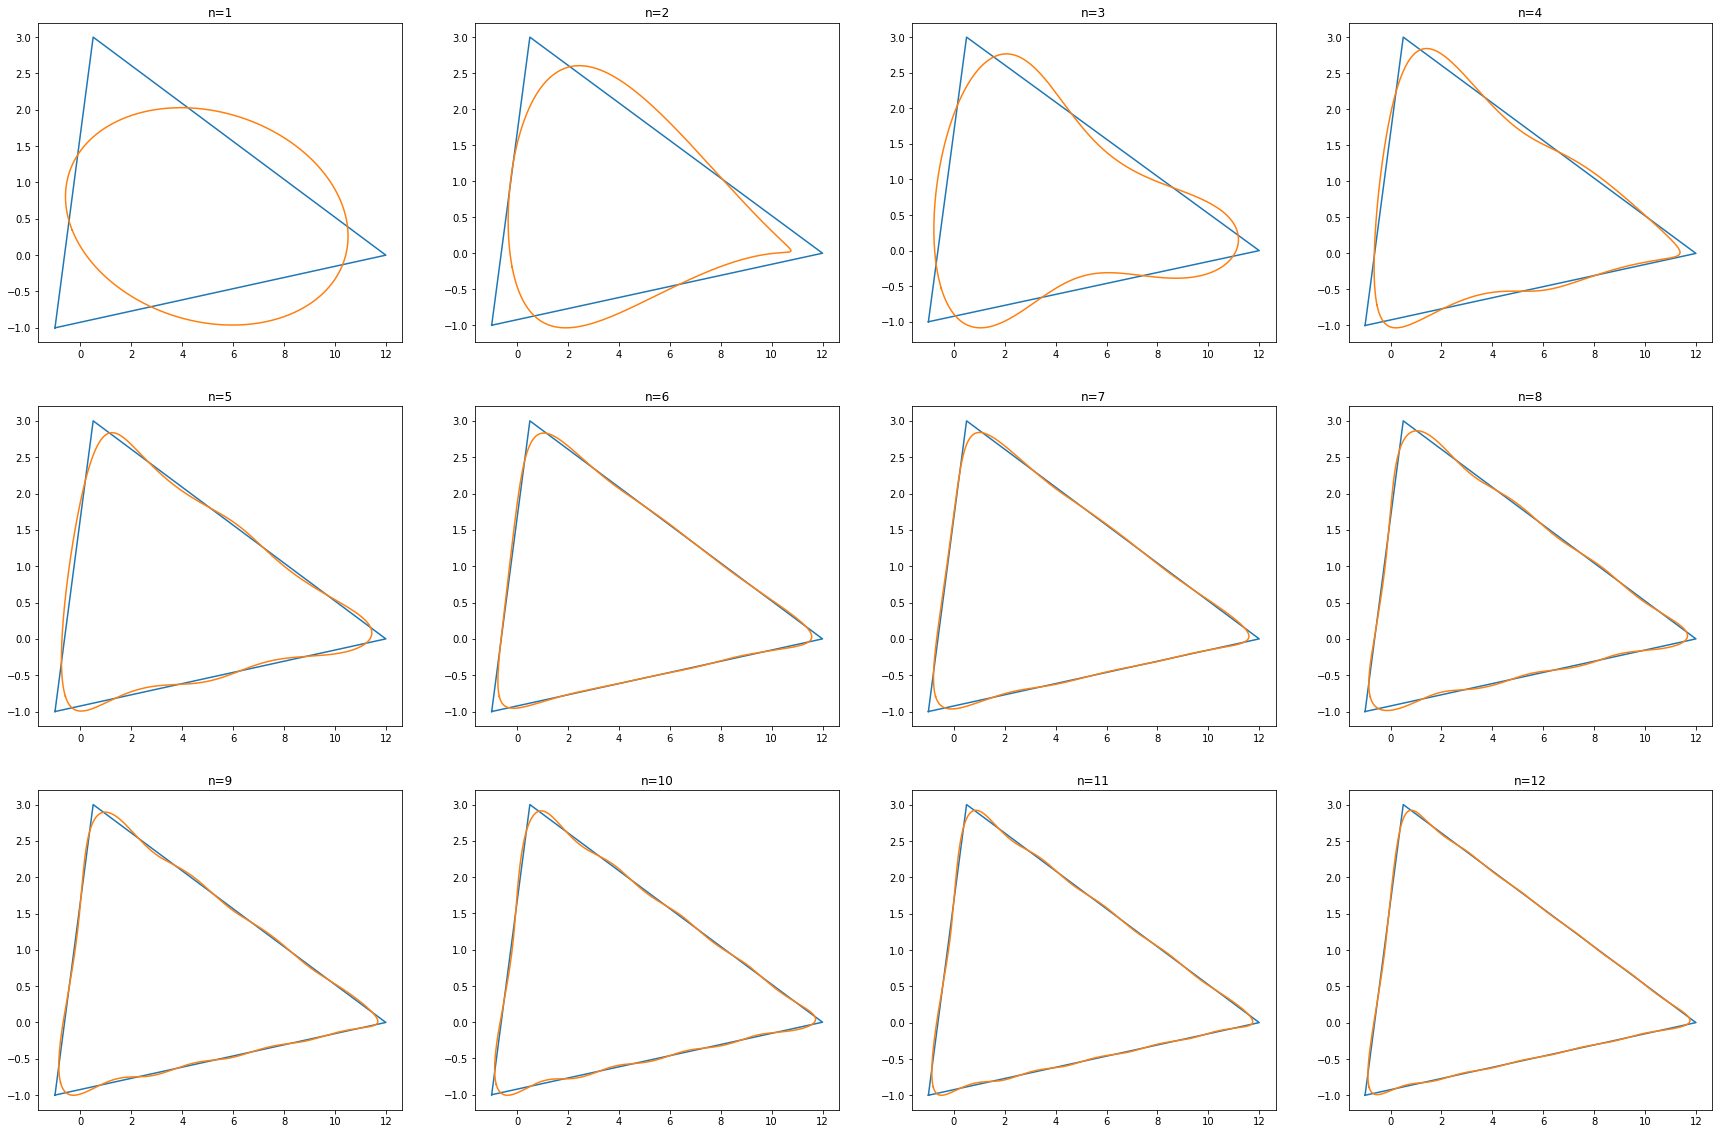

In [8]:
plt.figure(figsize=(30,20))

# Number of points
nT = 1000

t = 2 * np.pi * np.arange(0,1, 1/nT)

for n in range(1, N+1):
    pf = fcts[n-1](t)
    
    plt.subplot(3,4,n)
    plotcc(p)
    plotcc(pf)
    plt.title(f"n={n}")

plt.show()